<a href="https://colab.research.google.com/github/ShannonH98/PyTorch_Practice_Projects/blob/main/Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [ ]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') #fix the formatting

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#drop unnecassary columns

df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['labels', 'data'] #rename the columns

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#create binary labels for the columns

df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33)

In [ ]:
df_train.shape, df_test.shape

((3733, 3), (1839, 3))

In [ ]:
idx = 1
word2idx = { '<PAD>':0}

In [ ]:
for i, row in df_train.iterrows():
  tokens = row['data'].lower().split()
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx += 1

In [ ]:
word2idx

{'<PAD>': 0,
 'easy': 1,
 'ah?sen': 2,
 'got': 3,
 'selected': 4,
 'means': 5,
 'its': 6,
 'good..': 7,
 'dear': 8,
 'i': 9,
 'have': 10,
 'reache': 11,
 'room': 12,
 'smith': 13,
 'waste': 14,
 'da.i': 15,
 'wanna': 16,
 'gayle.': 17,
 'dont': 18,
 'any': 19,
 'of': 20,
 'your': 21,
 'file': 22,
 'in': 23,
 'my': 24,
 'bag..i': 25,
 'was': 26,
 'work': 27,
 'when': 28,
 'you': 29,
 'called': 30,
 'me.i': 31,
 "'ll": 32,
 'tell': 33,
 'if': 34,
 'find': 35,
 'anything': 36,
 'room.': 37,
 'sorry,': 38,
 "i'll": 39,
 'call': 40,
 'later': 41,
 'happy': 42,
 'new': 43,
 'years': 44,
 'melody!': 45,
 'camera': 46,
 '-': 47,
 'are': 48,
 'awarded': 49,
 'a': 50,
 'sipix': 51,
 'digital': 52,
 'camera!': 53,
 '09061221066': 54,
 'fromm': 55,
 'landline.': 56,
 'delivery': 57,
 'within': 58,
 '28': 59,
 'days.': 60,
 'once': 61,
 'fishrman': 62,
 'woke': 63,
 'early': 64,
 'd': 65,
 'mrng.': 66,
 'it': 67,
 'very': 68,
 'dark.': 69,
 'he': 70,
 'waited': 71,
 'while': 72,
 '&amp;': 73,
 'fou

In [ ]:
len(word2idx)

10440

In [ ]:
#convert data into word indices

train_sentences_as_int = []

for i, row in df_train.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens]
  train_sentences_as_int.append(sentence_as_int)

In [ ]:
test_sentences_as_int = []

for i, row in df_test.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens if token in word2idx]
  test_sentences_as_int.append(sentence_as_int)

In [ ]:
len(train_sentences_as_int), len(test_sentences_as_int)

(3733, 1839)

In [ ]:
def data_generator(X, y, batch_size = 32):
  X, y = shuffle(X, y)
  n_batches = int(np.ceil(len(y) / batch_size))
  for i in range(n_batches):
    end = min((i + 1) * batch_size, len(y))

    X_batch = X[i * batch_size : end]
    y_batch = y[i * batch_size : end]

    #pad X_batch to be N x T
    max_len = max([len(x) for x in X_batch])
    for j in range(len(X_batch)):
      x = X_batch[j]
      pad = [0] * (max_len - len(x))
      X_batch[j] = x + pad

    X_batch = torch.from_numpy(np.array(X_batch)).long()
    y_batch = torch.from_numpy(np.array(y_batch)).long()

    yield X_batch, y_batch

In [ ]:
for inputs, targets in data_generator(train_sentences_as_int, df_train.b_labels):
  print("inputs", inputs, "shape:", inputs.shape)
  print("targets", targets, "shape:", targets.shape)
  break

inputs tensor([[ 338,  222,   21,  ...,    0,    0,    0],
        [   9,  533,  315,  ...,    0,    0,    0],
        [7803,  320,  124,  ...,    0,    0,    0],
        ...,
        [2291,  325, 2292,  ...,  173,   21, 2304],
        [  18, 1772, 3005,  ...,    0,    0,    0],
        [ 267, 2539,  122,  ...,    0,    0,    0]]) shape: torch.Size([32, 77])
targets tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0]) shape: torch.Size([32])


In [ ]:
for inputs, targets in data_generator(test_sentences_as_int, df_test.b_labels):
  print("inputs", inputs, "shape:", inputs.shape)
  print("targets", targets, "shape:", targets.shape)
  break

inputs tensor([[8640, 2464,  148,  ...,    0,    0,    0],
        [ 970,   21, 2626,  ...,    0,    0,    0],
        [ 262,  998, 1328,  ...,    0,    0,    0],
        ...,
        [3540, 1302,  888,  ...,    0,    0,    0],
        [2401,  104, 2464,  ...,    0,    0,    0],
        [ 354, 2132,    0,  ...,    0,    0,    0]]) shape: torch.Size([32, 32])
targets tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]) shape: torch.Size([32])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)

  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [ ]:
model = RNN(len(word2idx), 20, 15, 1, 1)
model.to(device)


RNN(
  (embed): Embedding(10440, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
train_gen = lambda: data_generator(train_sentences_as_int, df_train.b_labels)
test_gen = lambda: data_generator(test_sentences_as_int, df_test.b_labels)

In [ ]:
def batch_gd(model, criterion, optimizer, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_gen():
      targets = targets.view(-1, 1).float()
      inputs, targets = inputs.to(device), targets.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)

      loss = criterion(outputs, targets)

      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    train_loss = np.mean(train_loss)

    test_loss =[]
    for inputs, targets in test_gen():
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())

    test_loss = np.mean(test_loss)

    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch {it + 1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Duration: {dt}')

  return train_losses, test_losses

In [ ]:
train_losses, test_losses = batch_gd(model,
                                     criterion,
                                     optimizer,
                                     15)

Epoch 1/15 | Train Loss: 0.3907 | Test Loss: 0.3598 | Duration: 0:00:00.339608
Epoch 2/15 | Train Loss: 0.3597 | Test Loss: 0.3248 | Duration: 0:00:00.337254
Epoch 3/15 | Train Loss: 0.2973 | Test Loss: 0.2539 | Duration: 0:00:00.340913
Epoch 4/15 | Train Loss: 0.2444 | Test Loss: 0.2240 | Duration: 0:00:00.335759
Epoch 5/15 | Train Loss: 0.1739 | Test Loss: 0.1868 | Duration: 0:00:00.330823
Epoch 6/15 | Train Loss: 0.1343 | Test Loss: 0.1508 | Duration: 0:00:00.343357
Epoch 7/15 | Train Loss: 0.1056 | Test Loss: 0.1403 | Duration: 0:00:00.328773
Epoch 8/15 | Train Loss: 0.0882 | Test Loss: 0.1438 | Duration: 0:00:00.329299
Epoch 9/15 | Train Loss: 0.0712 | Test Loss: 0.1542 | Duration: 0:00:00.337518
Epoch 10/15 | Train Loss: 0.0864 | Test Loss: 0.1294 | Duration: 0:00:00.333057
Epoch 11/15 | Train Loss: 0.0592 | Test Loss: 0.1250 | Duration: 0:00:00.341718
Epoch 12/15 | Train Loss: 0.0506 | Test Loss: 0.1203 | Duration: 0:00:00.349127
Epoch 13/15 | Train Loss: 0.0423 | Test Loss: 0.1

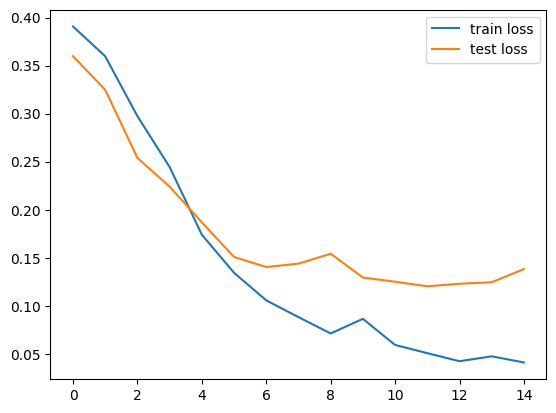

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
# Accuracy

model.eval()  # set model to eval mode
n_correct = 0
n_total = 0

with torch.no_grad():
  for inputs, targets in train_gen():
    targets = targets.view(-1, 1).float().to(device)
    inputs = inputs.to(device)

    # Forward pass
    outputs = model(inputs)

    # Get binary prediction
    predictions = (outputs > 0.5).float()  # threshold at 0.5 for sigmoid output

    # Update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.size(0)

train_acc = n_correct / n_total


# Test accuracy
n_correct = 0
n_total = 0

with torch.no_grad():
  for inputs, targets in test_gen():
    targets = targets.view(-1, 1).float().to(device)
    inputs = inputs.to(device)

    # Forward pass
    outputs = model(inputs)
    predictions = (outputs > 0.5).float()

    n_correct += (predictions == targets).sum().item()
    n_total += targets.size(0)

test_acc = n_correct / n_total

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 0.9917, Test acc: 0.9636
